In [2]:
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction.csv


In [3]:
import pandas as pd
import numpy as np

# Load Dataset
try:
  # Assuming the uploaded file name is known or can be retrieved from 'uploaded'
  # If you uploaded the file using files.upload(), the name is in the 'uploaded' dictionary
  uploaded_file_name = list(uploaded.keys())[0] # Get the name of the first uploaded file
  df = pd.read_csv(uploaded_file_name)
except FileNotFoundError:
  print(f"Error: '{uploaded_file_name}' not found. Please make sure the file is in the correct directory.")
  df = None # Assign None to df if file not found
except IndexError:
  print("Error: No file was uploaded.")
  df = None


# Preview
if df is not None:
  print(df.shape)
  display(df.head())

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape


(10000, 12)

In [5]:
# Overview of datatypes and nulls
df.info()

# Check for missing values
df.isnull().sum()

# Quick value counts for the target
df['churn'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,proportion
churn,
0,0.7963
1,0.2037


## Churn Distribution

/tmp/ipython-input-6-2921854164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='pastel')


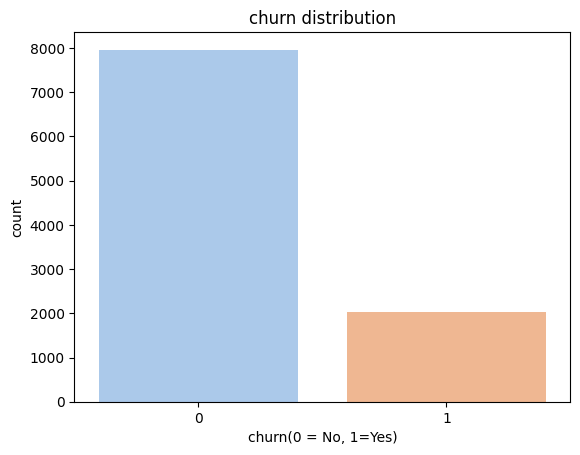

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot churn distribution
sns.countplot(data=df, x='churn', palette='pastel')
plt.title('churn distribution')
plt.xlabel('churn(0 = No, 1=Yes)')
plt.ylabel('count')
#plt.savefig('outputs/churn_distribution.png', bbox_inches='tight')
plt.show()

###Numerical Feature Distributions

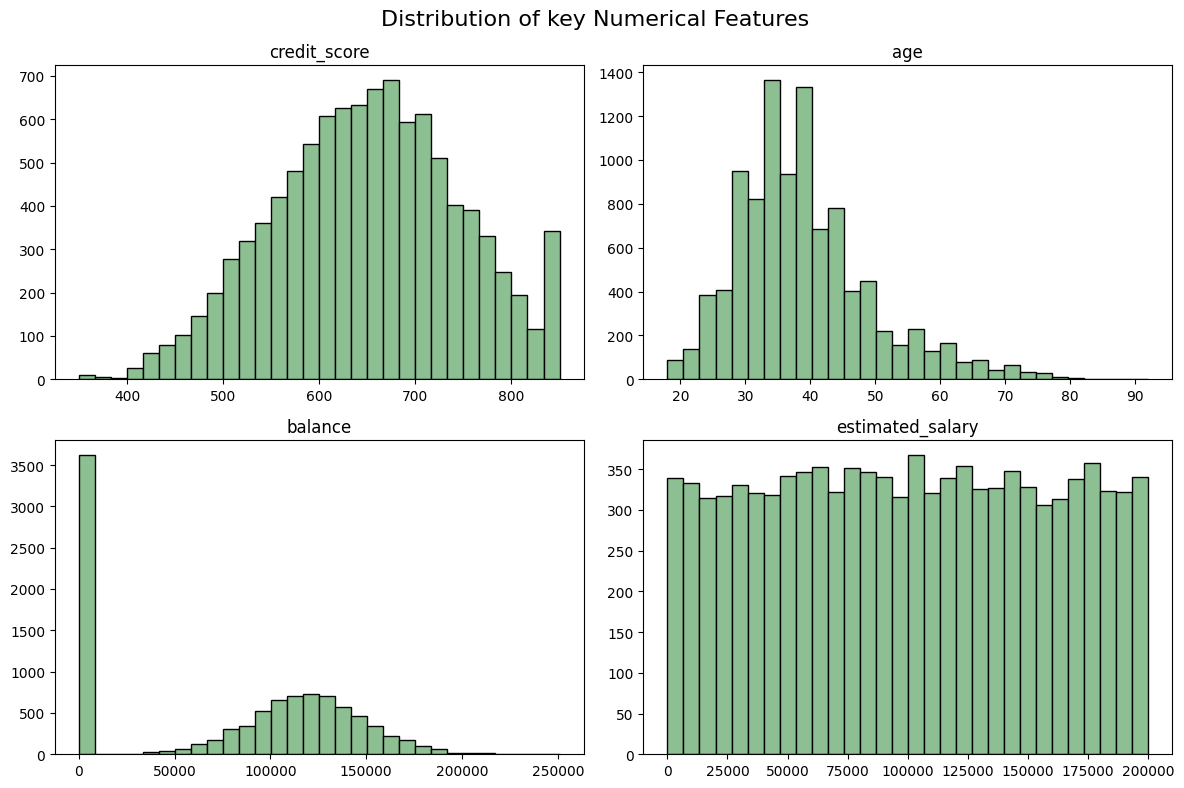

In [7]:
df[['credit_score', 'age', 'balance', 'estimated_salary']].hist(
    figsize=(12, 8), bins=30, grid=False, edgecolor='black', color='#8cbf91'
)
plt.suptitle('Distribution of key Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

###Categorical Plots

### Gender

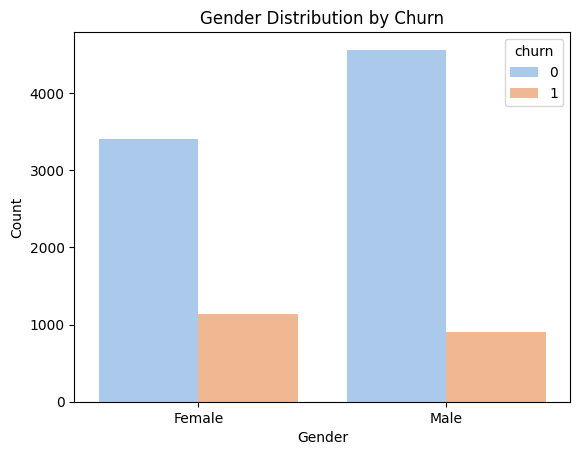

In [8]:
# Gender vs Churn
sns.countplot(data=df, x='gender', hue='churn', palette='pastel')
plt.title('Gender Distribution by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.savefig('outputs/gender_vs_churn.png', bbox_inches='tight')
plt.show()

### Country

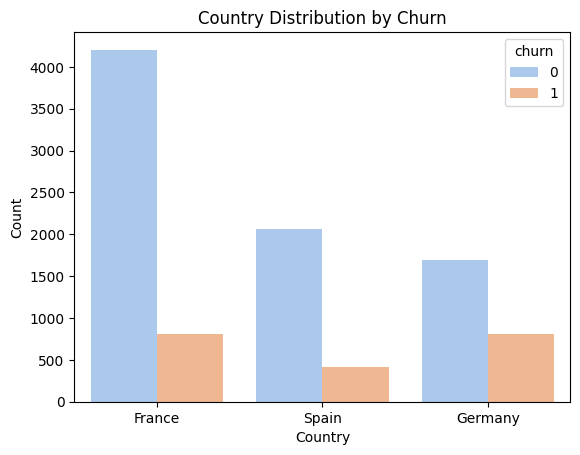

In [9]:
# Country vs Churn
sns.countplot(data=df, x='country', hue='churn', palette='pastel')
plt.title('Country Distribution by Churn')
plt.xlabel('Country')
plt.ylabel('Count')
#plt.savefig('outputs/country_churn_percent.png', bbox_inches='tight')
plt.show()

### Products_number

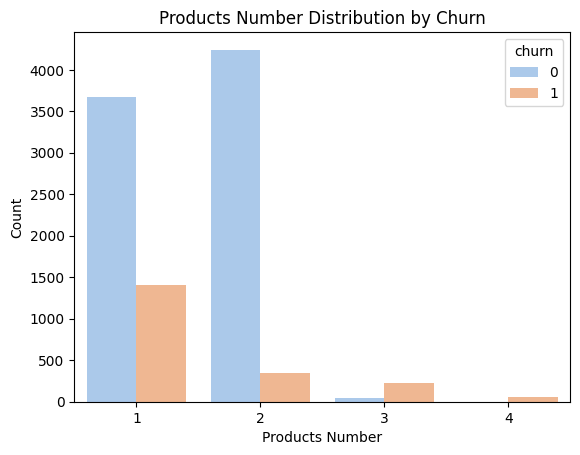

In [10]:
# products number vs churn
sns.countplot(data=df, x='products_number', hue='churn', palette='pastel')
plt.title('Products Number Distribution by Churn')
plt.xlabel('Products Number')
plt.ylabel('Count')
plt.show()

### active_member


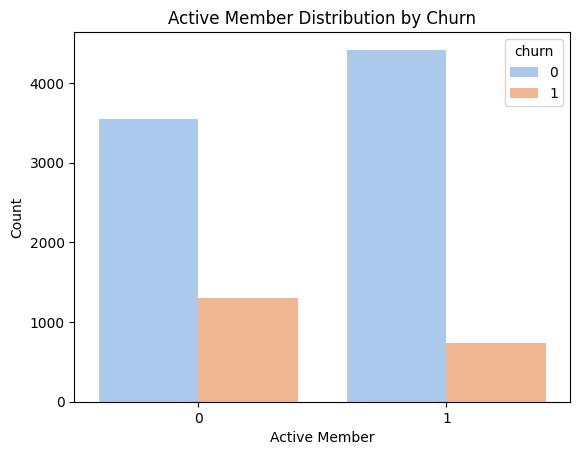

In [11]:
# active member vs churn
sns.countplot(data=df, x='active_member', hue='churn', palette='pastel')
plt.title('Active Member Distribution by Churn')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.show()
#

### credit_card


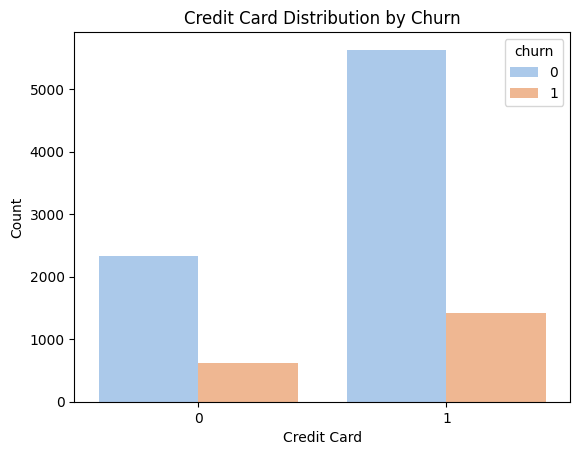

In [12]:
# credit card vs churn
sns.countplot(data=df, x='credit_card', hue='churn', palette='pastel')
plt.title('Credit Card Distribution by Churn')
plt.xlabel('Credit Card')
plt.ylabel('Count')
#plt.savefig('outputs/credit_card_vs_churn.png', bbox_inches='tight')
plt.show()

### Bivariate Analysis (Churn vs Features)
This phase helps us answer:

What patterns or relationships drive churn?

### Age vs Churn

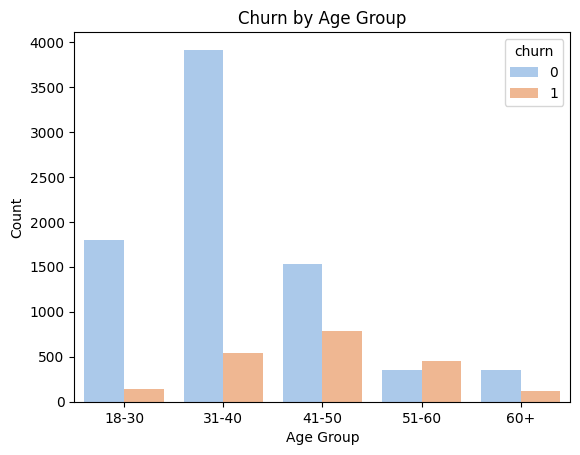

In [13]:
# create age bins
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100],
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# plot
sns.countplot(data=df, x='age_group', hue='churn', palette='pastel')
plt.title('Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
#plt.savefig('outputs/age_vs_churn.png', bbox_inches='tight')
plt.show()

### Tenure vs Churn

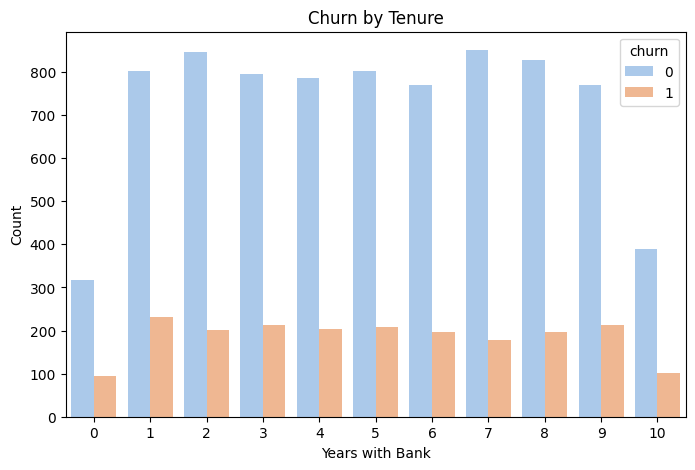

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tenure', hue='churn', palette='pastel')
plt.title('Churn by Tenure')
plt.xlabel('Years with Bank')
plt.ylabel('Count')
#plt.savefig('outputs/tenure_vs_churn.png', bbox_inches='tight')
plt.show()

### Country vs Churn (Now as %)

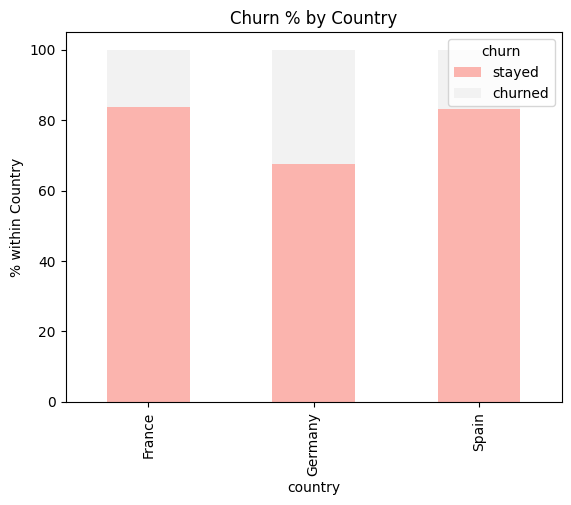

In [15]:
country_churn = pd.crosstab(df['country'], df['churn'], normalize='index') * 100
country_churn.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Churn % by Country')
plt.ylabel('% within Country')
plt.legend(title='churn', labels=['stayed', 'churned'])
plt.show()

### Balance vs Churn (using KDE plots)

>This gives us a smooth comparison of balance patterns for churned vs retained customers.



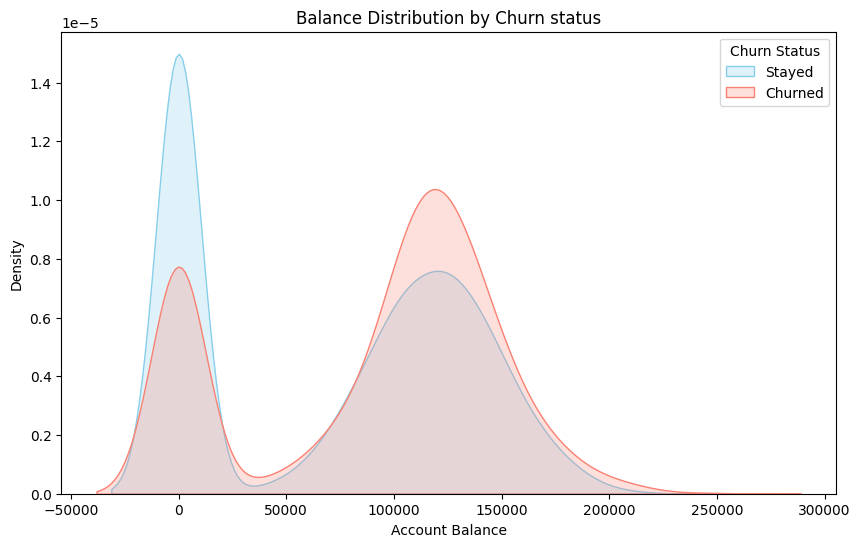

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['churn']==0], x='balance', label='stayed', fill=True, color='skyblue')
sns.kdeplot(data=df[df['churn']==1], x='balance', label='churned', fill=True, color='salmon')
plt.title('Balance Distribution by Churn status')
plt.legend(title='Churn Status', labels=['Stayed', 'Churned'])
plt.xlabel('Account Balance')
#plt.savefig('outputs/balance_vs_churn.png', bbox_inches='tight')
plt.show()

### Active Member vs Churn

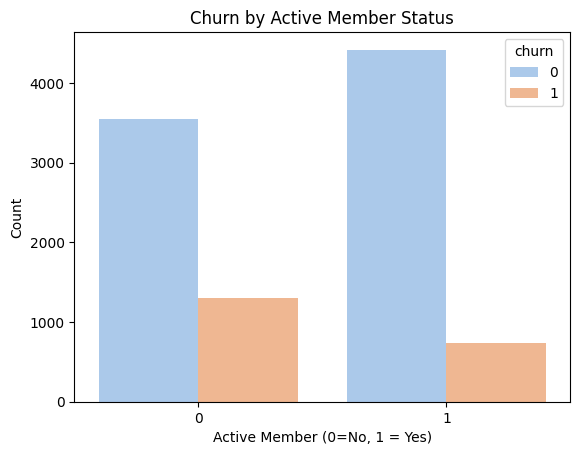

In [17]:
sns.countplot(data=df, x='active_member', hue='churn', palette='pastel')
plt.title('Churn by Active Member Status')
plt.xlabel('Active Member (0=No, 1 = Yes)')
plt.ylabel('Count')
#plt.savefig('outputs/active_member_vs_churn.png', bbox_inches='tight')
plt.show()

### Products Number vs Churn

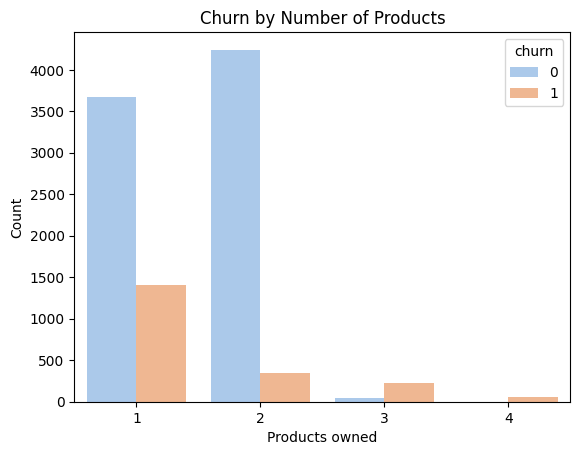

In [18]:
# Products Number vs Churn
sns.countplot(data=df, x='products_number', hue='churn', palette='pastel')
plt.title('Churn by Number of Products')
plt.xlabel('Products owned')
plt.ylabel('Count')
#plt.savefig('outputs/products_number_vs_churn.png', bbox_inches='tight')
plt.show()

#### Save plots to file

In [19]:
import os

# Create the 'outputs' directory if it doesn't exist
os.makedirs('outputs', exist_ok=True)

# Data Cleaning & Feature Engineering.

In [20]:
# Check for nulls
df.isnull().sum()


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


# ENCODE CATEGORICAL VARIABLES

In [21]:
# Encode Gender (binary)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encode Country
df = pd.get_dummies(df, columns=['country'], drop_first=True)  # drop_first avoids dummy trap


In [22]:
df.head()


,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,41-50,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,41-50,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,41-50,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,31-40,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,41-50,False,True


#FEATURE ENGINEERING

In [23]:
# Combine credit_card and active_member into a signal feature
df['has_credit_and_active'] = ((df['credit_card'] == 1) & (df['active_member'] == 1)).astype(int)

# Tenure buckets
def group_tenure(val):
  if val <= 2:
    return 'New'
  elif val <= 5:
    return 'Mid'
  else:
    return 'Loyal'

df['tenure_group'] = df['tenure'].apply(group_tenure)

# Ratio feature: balance to estimated salary
df['balance_salary_ratio'] = df['balance'] / (df['estimated_salary'] + 1)  # +1 to avoid division by zero


In [24]:
df[['has_credit_and_active', 'tenure_group', 'balance_salary_ratio']].head()


,has_credit_and_active,tenure_group,balance_salary_ratio
0,1,New,0.000000
1,0,New,0.744670
2,0,Loyal,1.401362
3,0,New,0.000000
4,1,New,1.587035


In [25]:
df = pd.get_dummies(df, columns=['tenure_group'], drop_first=True)

In [26]:
df.columns

Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'age_group', 'country_Germany', 'country_Spain',
       'has_credit_and_active', 'balance_salary_ratio', 'tenure_group_Mid',
       'tenure_group_New'],
      dtype='object')

###CLASS IMBALANCE + TRAIN-TEST SPLIT

In [27]:
!pip install -q imbalanced-learn

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
# Save customer_id before dropping it completely
X = df.drop(['churn', 'age_group'], axis=1) # Drop 'age_group' as it's an object type

# Save a version of customer_id using the same indices
customer_ids = X['customer_id']

# Now drop customer_id from the X features
X = X.drop(columns=['customer_id'])

y = df['churn']


# Train-test split
X_train, X_test, y_train, y_test, customer_ids_train, customer_ids_test = train_test_split(
    X, y, customer_ids, test_size=0.2, stratify=y, random_state=42
)


# SMOTE to balance the classes in the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#MODELING + EVALUATION


###Baseline Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1331  262]
 [ 197  210]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1593
           1       0.44      0.52      0.48       407

    accuracy                           0.77      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.78      0.77      0.78      2000



###XGBoost Classifier

In [30]:
from xgboost import XGBClassifier

# Train
xgb_model = XGBClassifier(scale_pos_weight=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[1298  295]
 [ 115  292]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.72      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



###Model Tuning & Threshold Optimization

In [31]:
# Predict churn probabilities (instead of class labels)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get the probability for class 1 (churn)

###Precision-Recall Curve + AUC Score

/tmp/ipython-input-32-2030156932.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


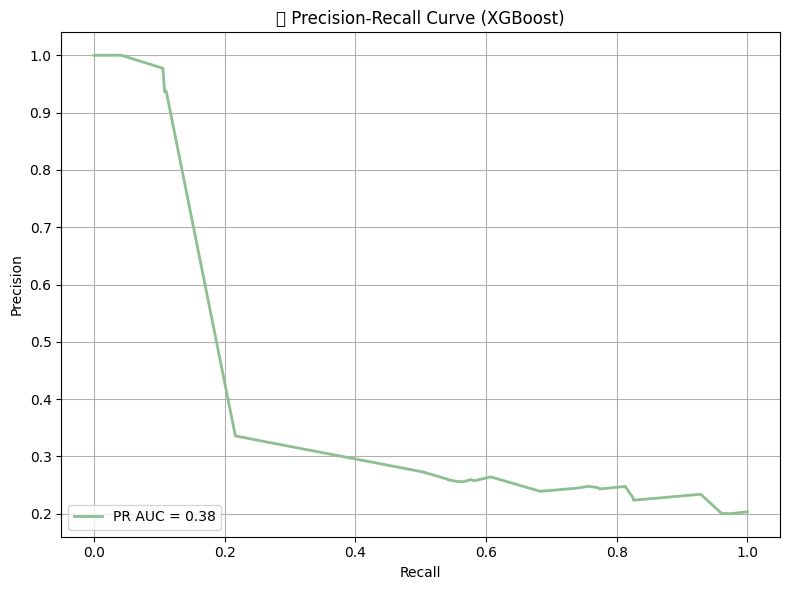

In [32]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate AUC
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="#8cbf91", lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve (XGBoost)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
#plt.savefig("outputs/precision_recall_curve.png")
plt.show()


### Threshold Tuning for Churn Prediction

In [33]:
thresholds = np.arange(0.1, 0.9, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n🔹 Threshold: {thresh:.2f}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(classification_report(y_test, y_pred_thresh))


🔹 Threshold: 0.10
[[628 965]
 [ 93 314]]
              precision    recall  f1-score   support

           0       0.87      0.39      0.54      1593
           1       0.25      0.77      0.37       407

    accuracy                           0.47      2000
   macro avg       0.56      0.58      0.46      2000
weighted avg       0.74      0.47      0.51      2000


🔹 Threshold: 0.15
[[628 965]
 [ 93 314]]
              precision    recall  f1-score   support

           0       0.87      0.39      0.54      1593
           1       0.25      0.77      0.37       407

    accuracy                           0.47      2000
   macro avg       0.56      0.58      0.46      2000
weighted avg       0.74      0.47      0.51      2000


🔹 Threshold: 0.20
[[628 965]
 [ 93 314]]
              precision    recall  f1-score   support

           0       0.87      0.39      0.54      1593
           1       0.25      0.77      0.37       407

    accuracy                           0.47      2000
  

In [34]:
# Save threshold evaluation results to file
results = [] # Initialize an empty list to store results

thresholds = np.arange(0.1, 0.9, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    matrix = confusion_matrix(y_test, y_pred_thresh)
    report = classification_report(y_test, y_pred_thresh)
    results.append((thresh, matrix, report)) # Append the results for each threshold

with open('outputs/threshold_evaluation.txt', 'w') as f:
    for thresh, matrix, report in results:
        f.write(f"🔹 Threshold: {thresh:.2f}\n")
        f.write(np.array2string(matrix))
        f.write("\n")
        f.write(report)
        f.write("\n\n")
print("✅ Threshold evaluation saved to outputs/threshold_evaluation.txt")

✅ Threshold evaluation saved to outputs/threshold_evaluation.txt


In [35]:
# Final threshold predictioction
final_thresh = 0.70
final_y_pred = (y_proba >= final_thresh).astype(int)

#Evaluate
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

[[923 670]
 [172 235]]
              precision    recall  f1-score   support

           0       0.84      0.58      0.69      1593
           1       0.26      0.58      0.36       407

    accuracy                           0.58      2000
   macro avg       0.55      0.58      0.52      2000
weighted avg       0.72      0.58      0.62      2000



### Feature Importance (XGBoost Style)
>This tells us what features drive churn the most according to our model.



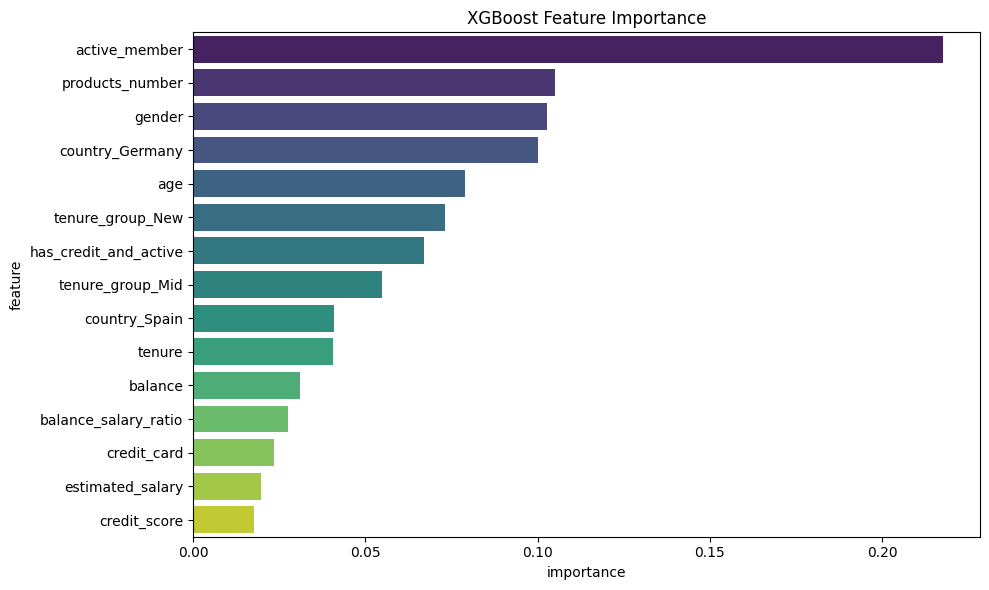

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from model
importances = xgb_model.feature_importances_
features = X_train_resampled.columns

# Create Dataframe
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis', hue='feature', legend=False)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.savefig("outputs/XGBoost_Feature_Importance.png")
plt.show()

### Save Trained XGBoost Model

In [37]:
import joblib

# Save model
joblib.dump(xgb_model, 'outputs/xgb_churn_model.pkl')
print("✅ Trained Model saved as output/xgb_churn_model.pkl")

✅ Trained Model saved as output/xgb_churn_model.pkl


In [38]:
# Save raw feature importance to file
with open('outputs/feature_importance_ranking.txt', 'w') as f:
    for col, val in zip(X_train_resampled.columns, xgb_model.feature_importances_):
        f.write(f"{col}: {val:.6f}\n")
print("✅ Feature importance ranking saved to outputs/feature_importance_ranking.txt")

✅ Feature importance ranking saved to outputs/feature_importance_ranking.txt


### Create Enriched Copy of X_test

In [39]:
# STEP 1: Copy X_test and enrich with predictions
X_test_enriched = X_test.copy()

# Add back customer_id using saved test IDs
X_test_enriched['customer_id'] = customer_ids_test.values

# Add churn probability and prediction
X_test_enriched['churn_probability'] = y_proba
X_test_enriched['predicted_churn'] = (y_proba >= final_thresh).astype(int)

# Reorder columns
cols = ['customer_id', 'churn_probability', 'predicted_churn'] + [col for col in X_test_enriched.columns if col not in ['customer_id', 'churn_probability', 'predicted_churn']]
X_test_enriched = X_test_enriched[cols]

# Sort by risk
X_test_sorted = X_test_enriched.sort_values(by='churn_probability', ascending=False)

# Preview top risky customers
X_test_sorted.head()


,customer_id,churn_probability,predicted_churn,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,has_credit_and_active,balance_salary_ratio,tenure_group_Mid,tenure_group_New
8884,15749583,0.997407,1,686,0,38,2,93569.86,3,0,0,10137.34,True,False,0,9.229308,False,True
6508,15700801,0.997407,1,850,1,42,6,84445.68,3,0,1,60021.34,True,False,0,1.406904,False,False
6831,15696989,0.997407,1,469,0,52,8,139493.25,3,0,0,150093.32,True,False,0,0.929371,False,False
2900,15668575,0.997407,1,626,0,26,8,148610.41,3,0,1,104502.02,False,True,0,1.422068,False,False
4842,15624820,0.997407,1,683,1,56,7,50911.21,3,0,0,97629.31,False,True,0,0.521469,False,False


### Export Top 10% High-Risk Customers as CSV

>Here’s a list of 200 customers with the highest likelihood of churning based on behavior and demographics. `Prioritize outreach to these customers`.

In [40]:
# Calculate top 10% count
top_10_percent_count = int(0.10 * len(X_test_sorted))

# Get top 10% risky customers
top_risky_customers = X_test_sorted.head(top_10_percent_count)

# Save to CSV
top_risky_customers.to_csv("top_10_percent_churn_risk_customers.csv", index=False)


### Create Customer Personas for High-Risk Segments

In [42]:
# Create a persona column combining key churn-related behaviors
top_risky_customers["persona"] = (
    top_risky_customers["tenure_group_New"].map({True: "New", False: ""}) +
    top_risky_customers["tenure_group_Mid"].map({True: "Mid", False: ""}) +
    top_risky_customers["country_Germany"].map({True: ", Germany", False: ""}) +
    top_risky_customers["country_Spain"].map({True: ", Spain", False: ", Other"}) +
    top_risky_customers["active_member"].map({1: ", Active", 0: ", Not Active"})
)

# Count and normalize
persona_counts = top_risky_customers["persona"].value_counts(normalize=True) * 100
persona_summary = persona_counts.reset_index()
persona_summary.columns = ["Persona", "% of Churn Risk Customers"]

# Show
persona_summary

# Save the top 10% churn-risk customers
top_risky_customers.to_csv('outputs/top_10_percent_churn_risk.csv', index=False)


/tmp/ipython-input-42-1368069224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_risky_customers["persona"] = (
